In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import re
import random

In [68]:
df = pd.read_csv("data-7-structure-4.csv.zip")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,13,18,19,20,32,35,37,40,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Функция для выделения года производства:

In [69]:
def get_year(x):
    if type(x) == str:
        res = re.findall("[0-9]{4}", x)
        if res:
            return int(res[0])
    return None

In [70]:
df["Год производства"] = df["Год производства"].apply(get_year)

Выберем данные для фильмов до 2000 г. и построим столбчатую диаграмму:

In [78]:
df1 = df[df["Год производства"] < 2000]
vc = df1["Страна производства"].value_counts()
vc = vc[vc > 110]

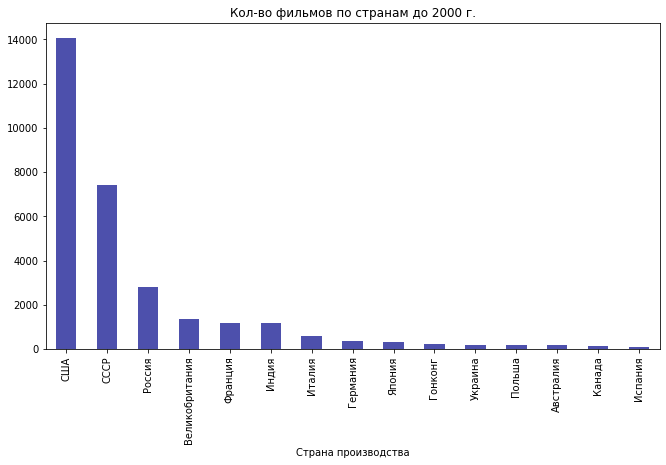

In [79]:
vc.plot.bar(
    title="Кол-во фильмов по странам до 2000 г.", 
    figsize=(11,6),
    color="#4D50AC",
    x="Страна производства", 
    y="Количество фильмов", 
    xlabel="Страна производства"
    );

Аналогично построим диаграмму для фильмов с 2000 г.

In [80]:
df2 = df[df["Год производства"] >= 2000]
vc2 = df2["Страна производства"].value_counts()
vc2 = vc2[vc2 > 150]

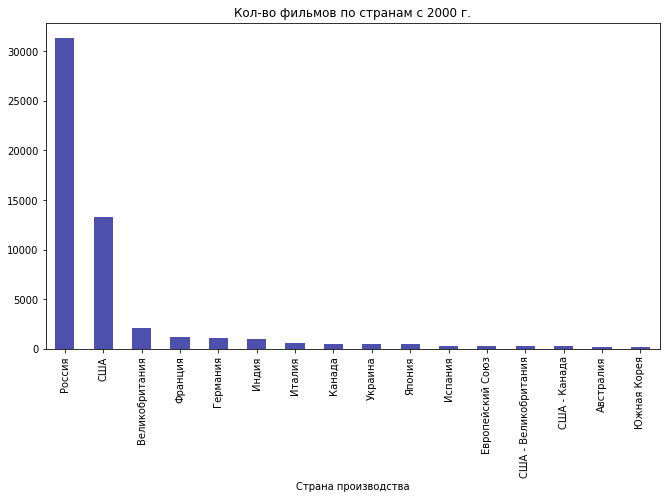

In [81]:
vc2.plot.bar(
    title="Кол-во фильмов по странам c 2000 г.", 
    figsize=(11,6),
    color="#4D50AC",
    x="Страна производства", 
    y="Количество фильмов", 
    xlabel="Страна производства"
    );

Функция для выделения возрастного ограничения фильма из ячейки

In [82]:
def get_age(x):
    if type(x) == str:
        res = re.findall("(\d+)", x)
        if res:
            return str(res[0] + '+')
    return None
df["Возрастная категория"] = df["Возрастная категория"].apply(get_age)

In [83]:
df1ages = df[df["Год производства"] < 2000]

In [84]:
df2ages = df[df["Год производства"] >= 2000]

Построим диаграмму распредения возрастных ограничений до 2000 г.

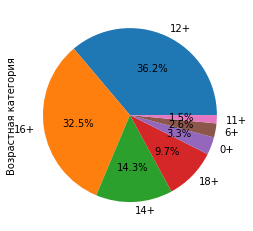

In [85]:
df1ages['Возрастная категория'].value_counts().plot.pie(autopct='%1.1f%%');

то же самое с фильмами после 2000 г.

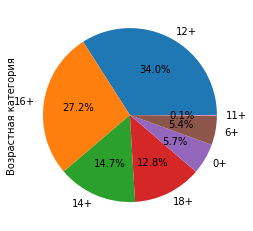

In [86]:
df2['Возрастная категория'].value_counts().plot.pie(autopct='%1.1f%%');

Построим диаграммы с информацией о самых популярных режиссерах до и после 2000

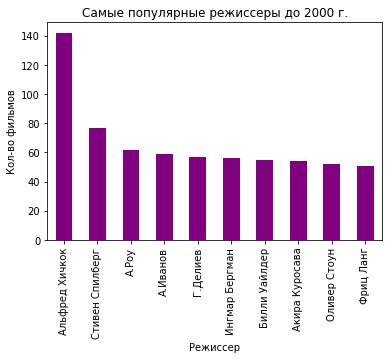

In [87]:
directors1 = df1["Режиссер"].value_counts().head(10)
directors1.plot.bar(
    title="Самые популярные режиссеры до 2000 г.",
    xlabel="Режиссер",
    ylabel="Кол-во фильмов",
    color='purple'
);

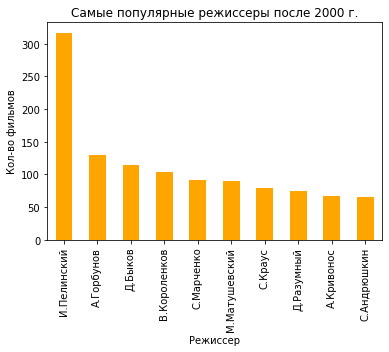

In [88]:
directors2 = df2["Режиссер"].value_counts().head(10)
directors2.plot.bar(
    title="Самые популярные режиссеры после 2000 г.",
    xlabel="Режиссер",
    ylabel="Кол-во фильмов",
    color='orange'
);

Wordclouds для названий фильмов

In [89]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

stops = set(stopwords.words('russian') + stopwords.words('english') + stopwords.words('german') + ['это', 'весь', 'который', 'мочь', 'свой', 'la', 'le', 'les', 'de', 'di', 'l'])

In [91]:
pip install pymorphy2

In [92]:
from pymorphy2 import MorphAnalyzer
from nltk.tokenize import wordpunct_tokenize

morph = MorphAnalyzer()

In [93]:
def lemmatize(x):
    if type(x) != str:
        return ""
    text = wordpunct_tokenize(x)
    result = []
    for word in text:
        if word.isalpha():
            nf = morph.parse(word)[0].normal_form
            if nf not in stops:
                result.append(nf)
    return " ".join(result)

In [94]:
text1ru = ' '.join(df1["Название фильма"].head(2000).apply(lemmatize).values)
text1eng = ' '.join(df1["Hаименование на иностранном языке"].head(2000).apply(lemmatize).values)
text2ru = ' '.join(df2["Название фильма"].head(2000).apply(lemmatize).values)
text2eng = ' '.join(df2["Hаименование на иностранном языке"].head(2000).apply(lemmatize).values)

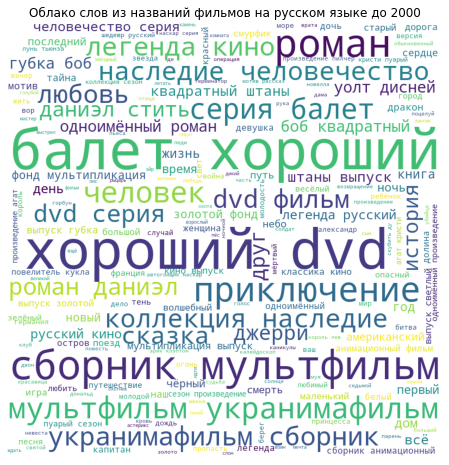

In [95]:
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text1ru)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов из названий фильмов на русском языке до 2000')
plt.show()

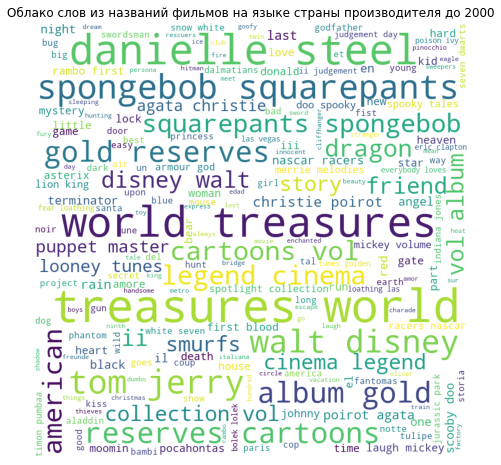

In [96]:
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text1eng)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов из названий фильмов на языке страны производителя до 2000')
plt.show()

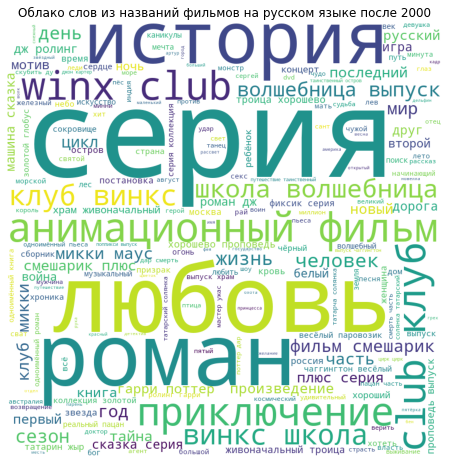

In [97]:
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text2ru)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов из названий фильмов на русском языке после 2000')
plt.show()

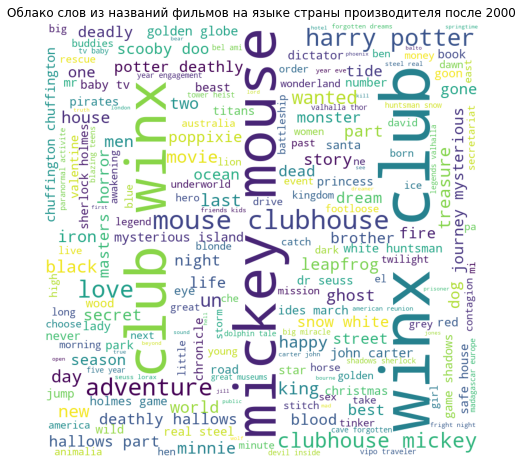

In [98]:
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text2eng)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов из названий фильмов на языке страны производителя после 2000')
plt.show()

In [99]:
df_years_before_2000_genre = df1['Вид Фильма'].value_counts().head(4)

In [100]:
df_years_before_2000_genre

Художественный    24093
Анимационный       4761
Прочие             3210
Документальный      771
Name: Вид Фильма, dtype: int64

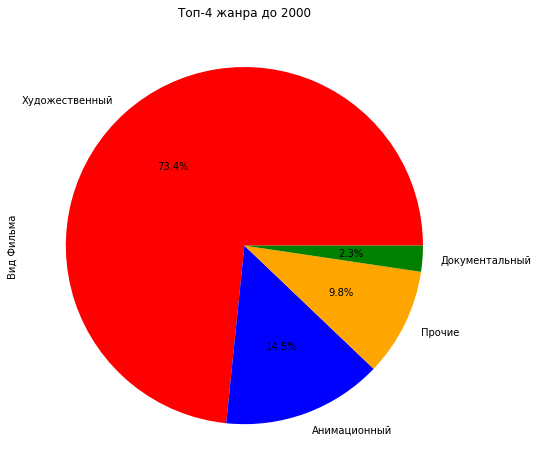

In [107]:
df_years_before_2000_genre_piechart = df_years_before_2000_genre.plot.pie(
    title="Топ-4 жанра до 2000",
    figsize=(8, 22),
    autopct="%1.1f%%",
    colors=["red", "blue", "orange", "green"],
)

In [ ]:
df_years_after_2000_genre = df2["Вид Фильма"].value_counts().head(4)


In [ ]:
df_years_after_2000_genre

Художественный    25300
Прочие            10298
Документальный     8631
Анимационный       6238
Name: Вид Фильма, dtype: int64

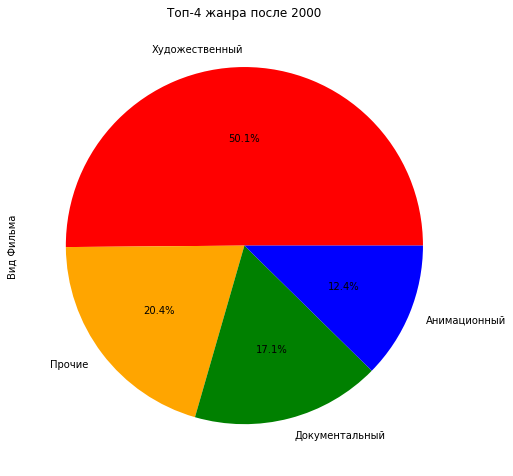

In [108]:
df_years_after_2000_genre_piechart = df_years_after_2000_genre.plot.pie(
    title="Топ-4 жанра после 2000",
    figsize=(8, 22),
    autopct="%1.1f%%",
    colors=["red", "orange", "green", "blue"],
)